# How to Process, Analyze and Visualize Data (III-a)
This is a course provided by MIT Open Course Ware.
This notebook solves Lab 3-a, namely hypothesis testing on US elections, including Welch's $t$-test, Shapiro-Wilk test for normality, and Mann-Whitney $U$ test.  

Extract Obama and McCain donations from the data file.

In [1]:
import csv
reader = csv.DictReader(open('donations.csv', 'r'))

donationsob = []
donationsmc = []
for row in reader:
    name = row['cand_nm']
    amount = float(row['contb_receipt_amt'])
    if 'Obama' in name:
        donationsob.append(amount)
    if 'McCain' in name:
        donationsmc.append(amount)

## Exercise 1
Compute the mean for Obama and McCain donations. The difference is called the *effect size*.

In [3]:
import numpy as np
ob_mean = np.mean(donationsob)
mc_mean = np.mean(donationsmc)

In [6]:
print(ob_mean)
print(mc_mean)
print('The effect size is ',mc_mean-ob_mean)

194.980462676
404.1854709
The effect size is  209.205008224


It looks like the average donation is much higher for McCain. Let us try to understand more, using a box-and-whiskers plot.

## Exercise 2
Build a box-and-whiskers plot of the Obama vs McCain donations.

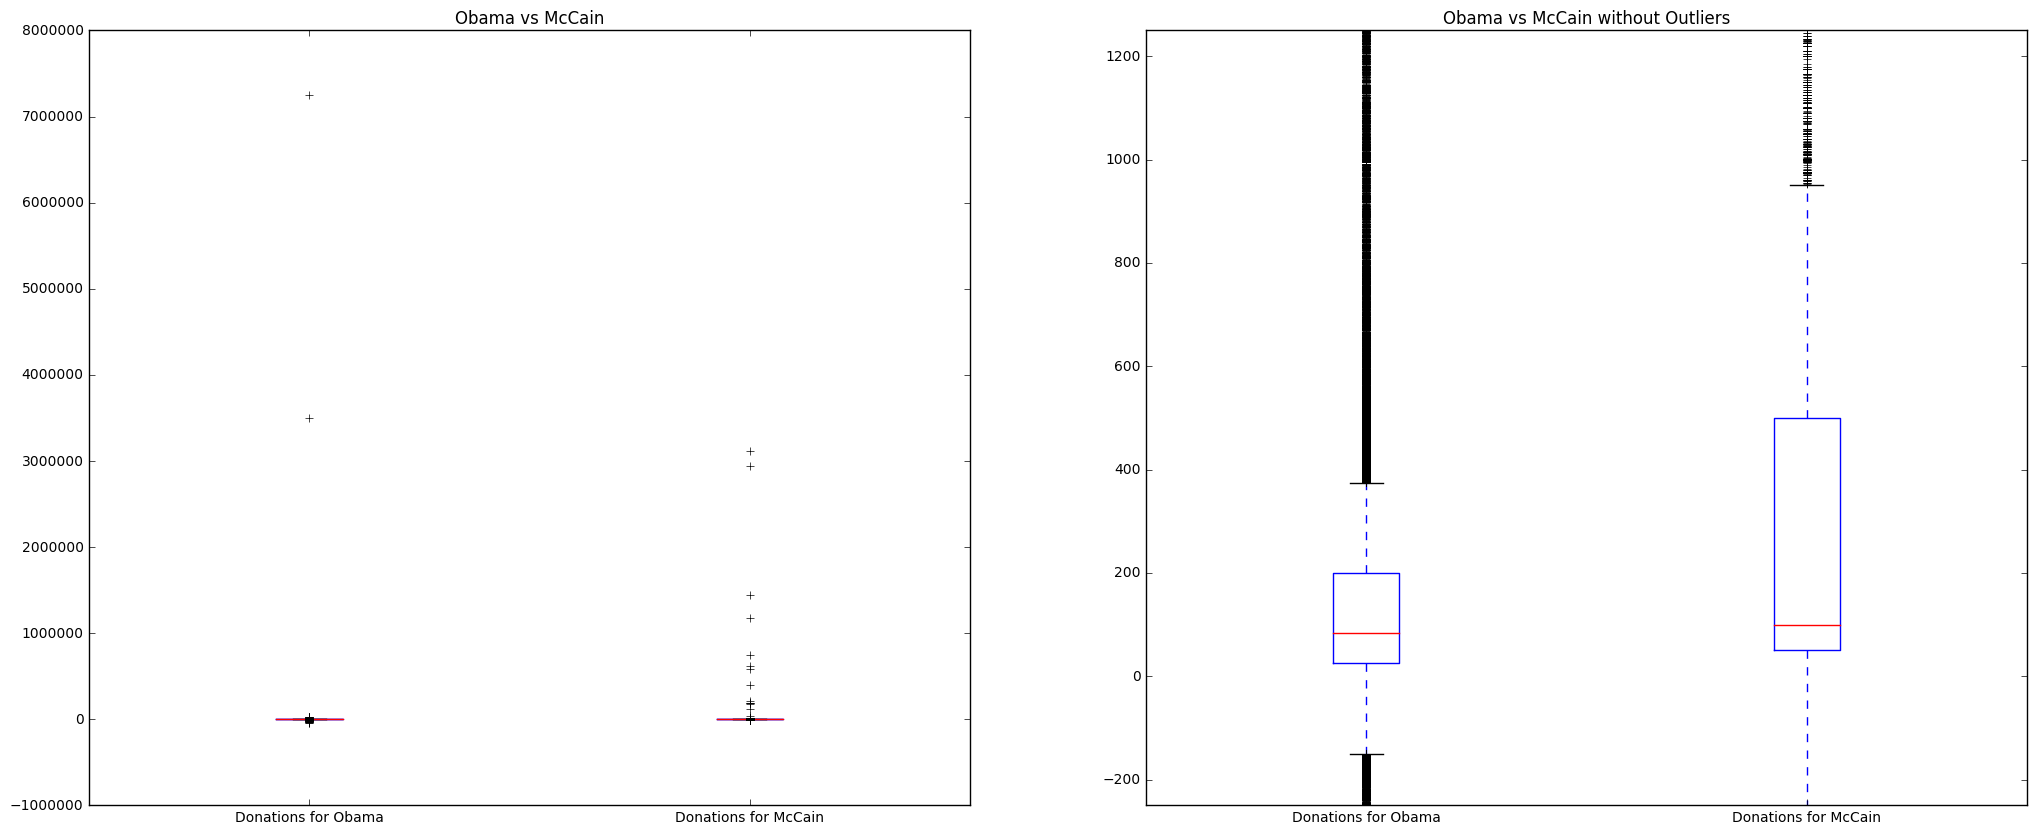

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
sub1 = fig.add_subplot(121)
#set the whisker, whis = 1 (see below)
sub1.boxplot([donationsob,donationsmc],whis=1)
sub1.set_xticklabels(('Donations for Obama', 'Donations for McCain'))
sub1.set_title('Obama vs McCain')

sub2 = fig.add_subplot(122)
sub2.boxplot([donationsob,donationsmc],whis=1)
#change y axis to remove outliers
sub2.set_ylim((-250,1250))
sub2.set_xticklabels(('Donations for Obama', 'Donations for McCain'))
sub2.set_title('Obama vs McCain without Outliers')
plt.show()

The red line is the *median*, meaning that 50% of the values of the donations will be above, and 50% below. Medians look pretty much the same. The bottom side of the box is the *25th percentile* (25% of the values of the donations will be below), again they 25th percentile look pretty much the same, while the top side of the box is the *75th percentile* (75% of the values of the donations will be below). This looks different, Obama has 75% of the values of the donations below 200, while McCain has 75% of the values of the donations below roughly 500. The difference between the 75th percentile and the 25th percentile is *the inner quartile range (IQR)*, which is visualized by the length of the box side.
The *whiskers* are the black lines. They are the largest values which are not considered as outliers. This is decided by the plot parameter whis. When setting whis = 1, whiskers are at a distance at most 1x the IQR from the bottom and top
sides of the box plot. For example for Obama, the IQR is a bit less than 200, so the below whisker is a bit above -200, while the above one is a bit below 400.

The means and box-and-whiskers plots are not too revealing, let us continue, and try to look at a more formal tool that will tell us whether the difference in means is meaningful.

# Welch's t test
Suppose we have a random variable $X$, with unknown mean $\mu$, known variance $\sigma^2$, but we have $n$ samples of it, that is $n$ random variables $X_1,\ldots,X_n$, which are assumed i.i.d, with mean $\mu$ and variance $\sigma^2$. A natural *estimator* for its mean would be $\hat{\mu}=\frac{1}{n}\sum_{i=1}^n X_i$. The first remark is that $\hat{\mu}$ is itself a random quantity: this is because it depends on the choice of $X_1,\ldots,X_n$. Thus $\hat{\mu}$ has a distribution, called *sampling distribution*, it also has a mean and a variance:
$$ E[\hat{\mu}]=\frac{1}{n}\sum_{i=1}^n E[X_i]=\mu$$
$$ var[\hat{\mu}]=\frac{1}{n^2}\sum_{i=1}^n var[X_i]=\frac{\sigma^2}{n}.$$
The expectation of $\hat{\mu}$ is equal to the true value of what $\hat{\mu}$ is trying to estimate, that is $\mu$ (we say that $\hat{\mu}$ is an *unbiased* estimator). Also its variance is decreasing when the number of samples $n$ increases, which is good. 

Since $\hat{\mu}$ is the sum of i.i.d random variables, the central limit theorem tells us that it is approximately Gaussian, thus if we subtract the mean $\mu$ and divide by its standard deviation $\sigma/\sqrt{n}$, the result, namely
$ z = \frac{\hat{\mu}-\mu}{\sigma/\sqrt{n}}$ is a normal random variable (with mean $0$ and variance $1$). Recall that $\sigma$ is assumed to be known, while $\mu$ is unknown but fixed, so the only random quantity here is $\hat{\mu}$.

Now that we have an estimator $\hat{\mu}$ and a modified estimator $z$ which is normal, the natural question is, given an observation of our estimator (based on the data we used to compute it), how are we sure that this estimator, a random quantity, will be within some distance of the fixed (unknown) $\mu$? Since our estimator is approximately Gaussian with mean $\mu$ and variance $\sigma^2/n$, we use the fact that the probability of a Gaussian random variable being far from its mean is unlikely: the probability of getting a value within 1 standard deviation of the mean is about 68%, for 2 standard deviations, it is about 95%, and for 3 standard deviations, it is about 99%. This means that there is a 95% chance of $\hat{\mu}$ being less than $2\sigma/\sqrt{n}$ away from $\mu$. In other words, with probability 95%, we will get a $\hat{\mu}$ that gives an interval $[\hat{\mu}\pm 2\sigma/\sqrt{n}]$ containing $\mu$. This is called a *confidence interval*. The same conclusion can be obtained from $z$:
$$0.95 \sim P(-2 \leq z \leq 2) = P(\hat{\mu}-2\sigma/\sqrt{n} \leq \mu \leq \hat{\mu}+2\sigma/\sqrt{n} ).$$

Suppose next we have a hypothesized value $\mu$, say $\mu=\mu_0$ and we obtain using the data a realization of $\hat{\mu}$ which is smaller than $\mu_0$. To quantify whether the realization of $\hat{\mu}$ is significantly smaller than $\mu_0$, one way is to assume that $\mu_0$ is the true value (though it is just hypothesized that $\mu=\mu_0$), and to compute the probability of getting a value smaller than the one we observed. If $\mu=\mu_0$, we know the distribution of $\hat{\mu}$ (or $z$), so if the observed value is close enough to the mean, this looks like a regular behaviour, but if the observed value is too close to the tail, then this is not likely to happen, the probability of getting a value even smaller will become very small, and thus the assumption that $\mu=\mu_0$ becomes hard to believe. 
Assuming that $\mu$ is the true value is an assumption, called *null assumption*, and is denoted by $H_0$. Assuming that the true mean is significantly smaller (or larger) is an *alternative hypothesis*, denoted by $H_1$. If $H_0$ is true, then the probability of obtaining a value at least as extreme as the one from the data is called a *$p$-value*, and if the $p$-value is less than say 0.05 (corresponding to a 1/20 chance of error), we consider the result *significant*, and the hypothesis $H_0$ is likely to be false.

Now all the above works under the assumption that $\sigma^2$ is known. If this is not the case, we can of course replace $\sigma$ by $\hat{\sigma}$ which is the sample standard deviation. 
The difference is that once we use $\hat{\sigma}$, then $ z = \frac{\hat{\mu}-\mu}{\hat{\sigma}/\sqrt{n}}$ is not Gaussian anymore (now both $\hat{\mu}$ and $\hat{\sigma}$ are random), the denominator turns out to be approximately $\chi^2$-distributed, and the overall statistics is $t$-distributed, with $n-1$ degrees of freedom. Using $\hat{\sigma}$ instead of $\sigma$, and the $t$-distribution instead of the Gaussian distribution, one can redo confidence intervals and hypothesis tests as explained above. See http://www.mit.edu/~6.s085/ for the main reference used, and more details.

All the explanation above was about one sample, and determining whether the mean is significantly greater than some hypothesized amount. Now we want to move to the case where we want to compare two samples (or say, the difference of these two samples). Typically, we want to know whether the difference is significantly different from zero. The case of interest here, for the election donations, has two samples (Obama's donations, and McCain's donations), and the variances must be estimated separately (the data is then called *heteroskedastic*). Our goal is indeed to tell whether the two means are significantly different. This is where the *Welch's t-test* is used. For this, we refer to the thesis of J. Loveland [JL], from Utah University.

The first problem is variance estimation. To do that, define $s=\frac{1}{n-1}\sum_{i=1}^n(X_i-\hat{\mu})$. Then [JL,Theor 19], $\frac{(n-1)s^2}{\sigma^2}$ has a chi-square distribution with $n-1$ degrees of freedom, and $var(s^2)=\frac{2\sigma^4}{n-1}.$ This gives the main theorem [JL, Theor 24], which says that if $X_1,\ldots,X_n$, $X_i\sim N(\mu_X,\sigma^2_X)$, and $Y_1,\ldots,Y_m$, $Y_i\sim N(\mu_Y,\sigma^2_Y)$, are independent, then $$
\frac{\hat{\mu_X}-\hat{\mu_Y}-(\mu_X-\mu_Y)}{\sqrt{\frac{s_X^2}{n}+\frac{s_Y^2}{m}}}
$$ has an approximate $t$-distribution with $\nu$ degrees of freedom, where
$$
\nu =\frac{\left( \frac{s_X^2}{n}+\frac{s_Y^2}{m}\right)^2}{\frac{s_X^4}{n^2(n-1)}+\frac{s_Y^4}{m^2(m-1)}}.
$$
The above works reasonably well even if the samples are not Gaussian to start with, as long as both sample sizes are large enough so that the means are normally distributed (a rule of thumb [JL,p.101], this works if $n \geq 15$).

Concretely for us here, $X_i$ and $Y_j$ are the donations for Obama and McCain respectively.
We can thus compute $\hat{\mu_X}$ and $\hat{\mu_Y}$, in fact, we did so above, 
and $\hat{\mu_X}\sim 195$, $\hat{\mu_Y}\sim 404$. We can similarly compute $s_X$ and $s_Y$, e.g., $s_X=\frac{195 n}{n-1} -\frac{n \hat{\mu_X}}{n-1}$ where $n$ is the number of Obama's donations. The null hypothesis and alternative hypothesis are
$$H_0: \mu_X - \mu_Y = 0$$
$$H_1: \mu_X - \mu_Y \neq 0. $$
This means that the test statistics is
$$
t = \frac{\hat{\mu_X}-\hat{\mu_Y}}{\sqrt{\frac{s_X^2}{n}+\frac{s_Y^2}{m}}}
$$ 
and $\nu$ will be the above quantity rounded down to the nearest integer.
To find the $p$-value, we then need to compute the probability $2P(T \leq |t|)$ (the absolute value means we are considering a *two sided* case), which is basically computing the area in the tails of the $t$-distribution with degrees of freedom $\nu$.
Once the $p$-value is known, we need to decide how it compares with a desired significance level $\alpha$. If the $p$-value is smaller than $\alpha$, the observed outcome was not very likely given the null hypothesis is true, so we reject the null hypothesis. Otherwise we fail to reject $H_0$.

The ttest_ind python function computes exactly the above: ``This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.'' So since we do not want identical variances, we introduce a tag to mention that the variances are different, and the function returns the $t$-statistics and the two-tailed p-value.

## Exercise 3
Run the Welch's $t$-test on the campaign data.

In [22]:
import scipy.stats as stats
# ttest_ind function performs Welch’s t-test when the flag equal_var is set to False.
t_stat, p_val = stats.ttest_ind(donationsob, donationsmc, equal_var=False)
print(t_stat)
print(p_val)

-19.5567993462
3.85146587556e-85


The $p$-value is basically 0,  which means that our hypothesis $H_0$ that both means are the same is not likely. In other words, there seems to be a meaning to the difference of both means.

The Welch's $t$-test, as discussed above, works best if the data is normal. We also did give an argument that it should work fine if the sample size is large enough, but nevertheless, let us check whether our data can be assumed to be normally distributed. This is done using the *Shapiro-Wilk test*.

## The Shapiro-Wilk Test
Given a data sample $x_1,\ldots,x_n$, this test considers the statistics:
$$W=\frac{\sum_{i=1}^n a_i x_{(i)}}{\sum_{i=1}^n(x_i-\bar{x})^2}$$
where $x_{(i)}$ is the $i$th smallest value in the sample, $\bar{x}$ is the sample mean, and $a_i$ are constant computed from a normal distribution. We have that $W$ is a random quantity, when the $x_i$ are random variables. Now if we assume that the $x_i$ are random variables following a normal distribution, then we know the distribution of $W$, then we can compute a realization of $W$ by fixing the values of $x_i$ given by the data. We can then ask, assuming the null hypothesis $H_0$ that the $x_i$ are normally distributed, what is the probability that we get a value even more extreme than that from the data sample. This is our $p$-value. If the $p$-value is small, then we reject the hypothesis $H_0$, otherwise we fail to reject it.

## Exercise 4
Test the campaign contribution datasets for normality.

In [3]:
import scipy.stats as stats

wob, p_valob = stats.shapiro(donationsob)
print(wob,p_valob)
wmc, p_valmc = stats.shapiro(donationsmc)
print(wmc,p_valmc)

0.004588942974805832 0.0
0.01400134526193142 0.0


/home/frederique/anaconda3/lib/python3.5/site-packages/scipy/stats/morestats.py:1329: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The conclusion of the Shapiro-Wilk test is that we should reject the null hypothesis that the data is normally distributed. Thus our data was not normally distributed, we could feel insecure about using the Welch's $t$ test, in which case, an alternative is a non-parametric test called the Mann‐Whitney $U$ test. This test will check  whether two independent samples were selected from populations having the same distribution.

## The Mann-Whitney U Test

1. Take both samples and put them in a single set, then assign numeric ranks to all the observations starting from 1 for the smallest value. When observations have the same values, take the rank below and after, compute their midpoint and assign it as their rank.
2. Choose one sample, either the first or the second, for this sample of size $n$, compute the sum of the ranks, and call it $R$, and define the statistics $U$ by 
$$ U = R - \frac{n(n+1)}{2}.$$
The Mann-Whitney U Test is testing the null hypothesis $H_0$ that the probability of an observation from $X$ exceeding an observation from $Y$ equals the probability of an observation from $Y$ exceeding an observation from $X$. The alternative hypothesis $H_1$ is that these probabilities are different.
This test is also called *Wilcoxon rank-sum*.

## Exercise 5
Run the Mann‐Whitney $U$ test on the campaign data.

In [40]:
import scipy.stats as stats
#there seems to be a bug in the version of scipy that I am using
#the function tiecorrect used in mannwhitneyu generates a negative number 
#to avoid this problem, use instead ranksums, if tie handling is not an issue   
#u, p_val = stats.mannwhitneyu(donationsob,donationsmc)
u, p_val = stats.ranksums(donationsob,donationsmc)
print(u,p_val)

-228.934030498 0.0


The above concludes the same thing as the previous test, namely the means are different.